In [104]:
import pandas as pd
import json, folium

In [170]:
zara = pd.read_excel('./zarapro.xlsx')
zara.head()


,Name,Chain,Street,City,Province,Section,C_c,Latitude,Longitude
0,"('cord-la sierra',)",zara,poeta emilio prados,Córdoba,Córdoba,"Señora, Caballero, Niño",la sierra,37.896226,-4.791112
1,"('usu-urbil',)",zara,txikierdi auzoa,Usurbil,Gipuzkoa,"Señora, Caballero, Niño",urbil,43.276130,-2.024970
2,"('mur-constitucion',)",zara,de la constitucion,Murcia,Murcia,"Señora, Caballero,",NaN,37.989740,-1.131916
3,"('val-nuevo centro',)",zara,pio xii,Valencia,Valencia,"Señora, Caballero, Niño",nuevo centro,39.480789,-0.390694
4,"('vall-constitucion',)",zara,constitucion,Valladolid,Valladolid,"Señora, ,",NaN,41.651226,-4.726900


### Checking relation between number of stores and population

In [75]:
pivpop = pd.read_csv('./piv_population.csv')
pivpop.head()

,PROVINCIA,POBLACION_MUNI
0,A Coruña,1121815
1,Albacete,388270
2,Alicante,1879888
3,Almería,727945
4,Asturias,1018784


In [80]:
zaco = zara.pivot_table(index=['Province'], values='Chain', aggfunc = 'count')
zaco.head()

,Chain
Province,
A Coruña,6
Albacete,2
Alicante,13
Almería,2
Asturias,7


In [81]:
za_pob = pd.merge(zaco,pivpop, how = 'right', left_on='Province', right_on='PROVINCIA')
za_pob.head()

,Chain,PROVINCIA,POBLACION_MUNI
0,6.0,A Coruña,1121815
1,2.0,Albacete,388270
2,13.0,Alicante,1879888
3,2.0,Almería,727945
4,7.0,Asturias,1018784


In [82]:
za_pob.sort_values(by=['Chain'],ascending = False).head(10)

,Chain,PROVINCIA,POBLACION_MUNI
30,41.0,Madrid,6779888
7,31.0,Barcelona,5743402
41,18.0,Sevilla,1950219
33,14.0,Málaga,1685920
46,14.0,Valencia,2591875
2,13.0,Alicante,1879888
26,11.0,Las Palmas,1131065
39,11.0,Santa Cruz de Tenerife,1044887
37,10.0,Pontevedra,945408
16,8.0,Cádiz,1244049


In [83]:
za_pob['Num of store per 10k people'] = za_pob['Chain']/(za_pob['POBLACION_MUNI']/10000)

In [84]:
za_pob.sort_values(by=['Num of store per 10k people'],ascending = False).head(10)

,Chain,PROVINCIA,POBLACION_MUNI,Num of store per 10k people
12,3.0,Ceuta,84202,0.356286
31,2.0,Melilla,87076,0.229684
37,10.0,Pontevedra,945408,0.105774
39,11.0,Santa Cruz de Tenerife,1044887,0.105275
14,2.0,Cuenca,196139,0.101969
13,5.0,Ciudad Real,495045,0.101001
35,3.0,Ourense,306650,0.097831
26,11.0,Las Palmas,1131065,0.097253
25,3.0,La Rioja,319914,0.093775
41,18.0,Sevilla,1950219,0.092297


### Checking relation between number of stores and GDP

In [135]:
pib = pd.read_csv('./pib_pob.csv')
pib.head()

,province,PIB de Mercado,POBLACION_MUNI
0,Albacete,8235408,388270
1,Alicante,36521398,1879888
2,Almería,13979829,727945
3,Álava,11882941,333940
4,Asturias,23258673,1018784


In [136]:
print(type('PIB de Mercado'))
print(type('POBLACION_MUNI'))

<class 'str'>
<class 'str'>


In [137]:
pib_int = pib.astype({'PIB de Mercado': 'int','POBLACION_MUNI': 'int' })

In [138]:
pib['PIB per capita'] = pib['PIB de Mercado']/pib['POBLACION_MUNI']

In [139]:
pib.head()

,province,PIB de Mercado,POBLACION_MUNI,PIB per capita
0,Albacete,8235408,388270,21.210518
1,Alicante,36521398,1879888,19.427433
2,Almería,13979829,727945,19.204513
3,Álava,11882941,333940,35.584060
4,Asturias,23258673,1018784,22.829837


In [233]:
geopath = './spain_provinces.geojson'
geo = json.load(open(geopath))

geo_pib = folium.Map(location = ['40.2085', '-3.7130'], zoom_start = 6, tiles = 'cartodbpositron' )



folium.Choropleth(geo_data=geo, 
                  name='choropleth',
                  data=pib, 
                  columns=['province',"PIB per capita"],
                  key_on="feature.properties.name",
                  fill_color='BuPu',
                  fill_opacity=0.6,
                  line_opacity=0.5).add_to(geo_pib)


folium.LayerControl().add_to(geo_pib)

#geo_pib

In [141]:
table = pd.merge(za_pob,pib, how = 'outer', left_on='PROVINCIA', right_on='province')
table.head()



,Chain,PROVINCIA,POBLACION_MUNI_x,Num of store per 10k people,province,PIB de Mercado,POBLACION_MUNI_y,PIB per capita
0,6.0,A Coruña,1121815,0.053485,A Coruña,26682181,1121815,23.784832
1,2.0,Albacete,388270,0.051511,Albacete,8235408,388270,21.210518
2,13.0,Alicante,1879888,0.069153,Alicante,36521398,1879888,19.427433
3,2.0,Almería,727945,0.027475,Almería,13979829,727945,19.204513
4,7.0,Asturias,1018784,0.068709,Asturias,23258673,1018784,22.829837


In [142]:
table.set_index('PROVINCIA', inplace = True)
todo=table.drop(columns = ['POBLACION_MUNI_y','province','POBLACION_MUNI_x','PIB de Mercado'], axis = 1)
todo.head()

,Chain,Num of store per 10k people,PIB per capita
PROVINCIA,,,
A Coruña,6.0,0.053485,23.784832
Albacete,2.0,0.051511,21.210518
Alicante,13.0,0.069153,19.427433
Almería,2.0,0.027475,19.204513
Asturias,7.0,0.068709,22.829837


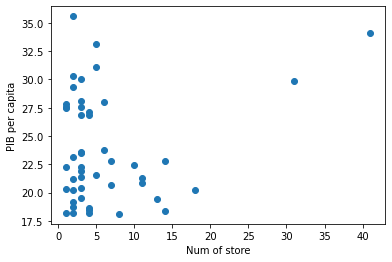

In [148]:
import matplotlib.pylab as plt

plt.scatter( todo['Chain'], todo['PIB per capita'])

plt.xlabel('Num of store')
plt.ylabel('PIB per capita')
plt.show()

### Checking relation between number of each brand store and population, GDP

In [190]:
import numpy as np

grouped = zara.groupby('Chain')


for name, group in grouped:
    print(name)
    print(group)
    
on_za = grouped.get_group("zara")
kiddy = grouped.get_group("kiddy's class")
lef = grouped.get_group("lefties")

kiddy's class
                                       Name          Chain  \
186            ('rib-rodriguez murias_kc',)  kiddy's class   
187                    ('utr-almazara_kc',)  kiddy's class   
188                   ('val-de españa_kc',)  kiddy's class   
189                ('mon-de andalucia_kc',)  kiddy's class   
190             ('vil-de la parellada_kc',)  kiddy's class   
191                    ('bcn-de sants_kc',)  kiddy's class   
192                ('c.real-el parque_kc',)  kiddy's class   
193                 ('xat-plaza mayor_kc',)  kiddy's class   
194            ('alc.guad-los alcores_kc',)  kiddy's class   
195             ('tor-costasol centro_kc',)  kiddy's class   
196                 ('ant-la veronica_kc',)  kiddy's class   
197                ('mana-rector rubi_kc',)  kiddy's class   
198              ('mol.seg-vega plaza_kc',)  kiddy's class   
199                 ('vic-santa clara_kc',)  kiddy's class   
200                  ('mad-juan muñoz_kc',)  kiddy's cla

In [178]:
zapiv = on_za.pivot_table(values = 'Chain',index = 'Province', aggfunc = 'count')
zapiv.head()

,Chain
Province,
A Coruña,5
Albacete,1
Alicante,8
Almería,2
Asturias,6


In [193]:
kipiv = kiddy.pivot_table(values = 'Chain',index = 'Province', aggfunc = 'count')
kipiv.head()

,Chain
Province,
A Coruña,1
Asturias,1
Badajoz,2
Baleares,1
Barcelona,7


In [194]:
lefpiv = lef.pivot_table(values = 'Chain',index = 'Province', aggfunc = 'count')
lefpiv.head()

,Chain
Province,
Albacete,1
Alicante,5
Badajoz,1
Barcelona,4
Bizkaia,1


In [195]:
chain= pd.merge(zapiv,kipiv, how = 'outer', on = 'Province')

In [196]:
chain2= pd.merge(chain,lepiv, how = 'outer', on = 'Province')
chain2.head()

,Chain_x,Chain_y,Chain
Province,,,
A Coruña,5.0,1.0,NaN
Albacete,1.0,NaN,1.0
Alicante,8.0,NaN,5.0
Almería,2.0,NaN,NaN
Asturias,6.0,1.0,NaN


In [203]:
chain2.columns = ['ZARA','Kiddy','lefties']
chain2.head()

,ZARA,Kiddy,lefties
Province,,,
A Coruña,5.0,1.0,NaN
Albacete,1.0,NaN,1.0
Alicante,8.0,NaN,5.0
Almería,2.0,NaN,NaN
Asturias,6.0,1.0,NaN


In [205]:
chain3 = chain2.reset_index()
chain3.head()

,Province,ZARA,Kiddy,lefties
0,A Coruña,5.0,1.0,NaN
1,Albacete,1.0,NaN,1.0
2,Alicante,8.0,NaN,5.0
3,Almería,2.0,NaN,NaN
4,Asturias,6.0,1.0,NaN


In [198]:
todo1=table.drop(columns = ['POBLACION_MUNI_y','province','PIB de Mercado','Chain','Num of store per 10k people'], axis = 1)
todo1.head()

,POBLACION_MUNI_x,PIB per capita
PROVINCIA,,
A Coruña,1121815,23.784832
Albacete,388270,21.210518
Alicante,1879888,19.427433
Almería,727945,19.204513
Asturias,1018784,22.829837


In [206]:
result= pd.merge(chain3,todo1, how = 'outer', left_on = 'Province', right_on = 'PROVINCIA')
result.head()

,Province,ZARA,Kiddy,lefties,POBLACION_MUNI_x,PIB per capita
0,A Coruña,5.0,1.0,NaN,1121815.0,23.784832
1,Albacete,1.0,NaN,1.0,388270.0,21.210518
2,Alicante,8.0,NaN,5.0,1879888.0,19.427433
3,Almería,2.0,NaN,NaN,727945.0,19.204513
4,Asturias,6.0,1.0,NaN,1018784.0,22.829837


In [208]:
result.set_index('Province').head()

,ZARA,Kiddy,lefties,POBLACION_MUNI_x,PIB per capita
Province,,,,,
A Coruña,5.0,1.0,NaN,1121815.0,23.784832
Albacete,1.0,NaN,1.0,388270.0,21.210518
Alicante,8.0,NaN,5.0,1879888.0,19.427433
Almería,2.0,NaN,NaN,727945.0,19.204513
Asturias,6.0,1.0,NaN,1018784.0,22.829837


In [226]:
resultint = result.astype({'ZARA': 'float','Kiddy': 'float','lefties': 'float'})

In [227]:
resultint.corr()

,ZARA,Kiddy,lefties,POBLACION_MUNI_x,PIB per capita
ZARA,1.000000,0.865845,0.538411,0.962332,0.304588
Kiddy,0.865845,1.000000,0.463943,0.903005,0.455949
lefties,0.538411,0.463943,1.000000,0.521821,0.048392
POBLACION_MUNI_x,0.962332,0.903005,0.521821,1.000000,0.266645
PIB per capita,0.304588,0.455949,0.048392,0.266645,1.000000


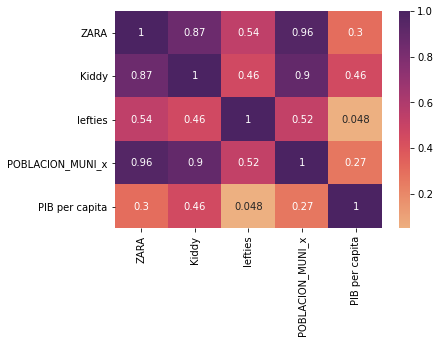

In [228]:
sns.heatmap(resultint.corr(), cmap='flare', annot=True) #cmap으로 전체적인 컬러 조정 가능
plt.show()

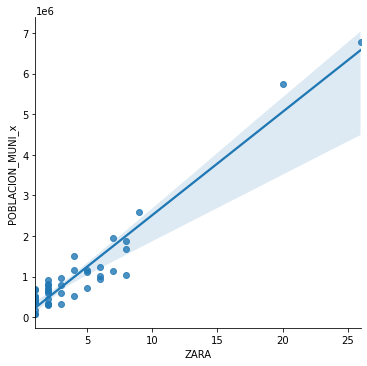

In [230]:
sns.lmplot(x='ZARA', y='POBLACION_MUNI_x', data=resultint)
plt.show()

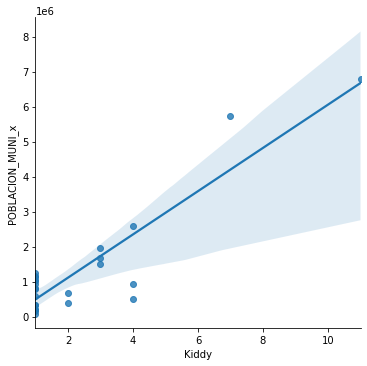

In [231]:
sns.lmplot(x='Kiddy', y='POBLACION_MUNI_x', data=resultint)
plt.show()